In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# EDA
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Find outliears
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [6]:
for i in df.columns:
    print (i)
    print(df[i].nunique())

age
77
job
12
marital
3
education
4
default
2
balance
7168
housing
2
loan
2
contact
3
day
31
month
12
duration
1573
campaign
48
pdays
559
previous
41
poutcome
4
y
2


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

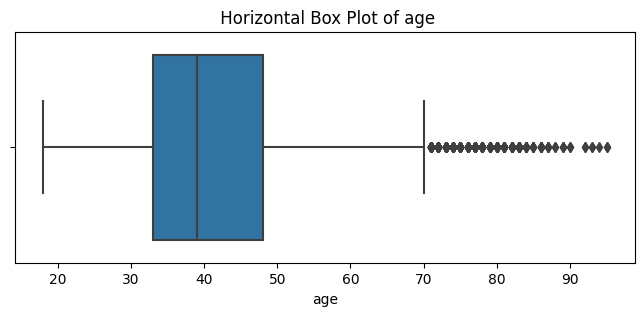

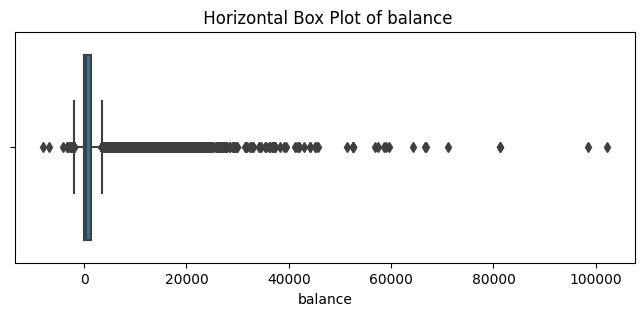

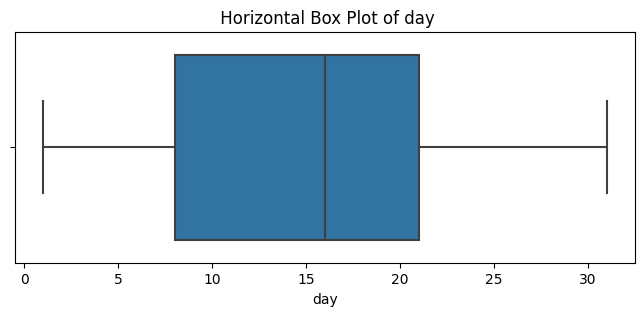

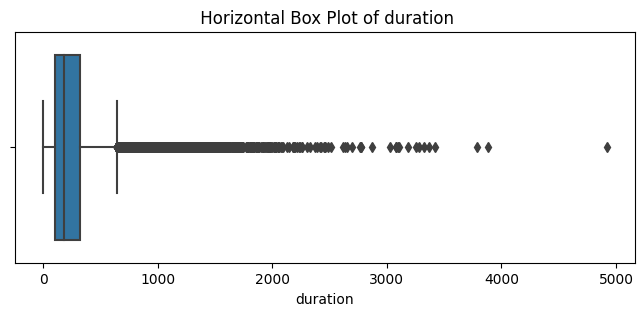

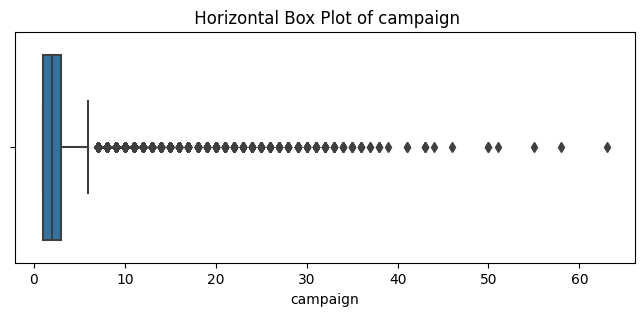

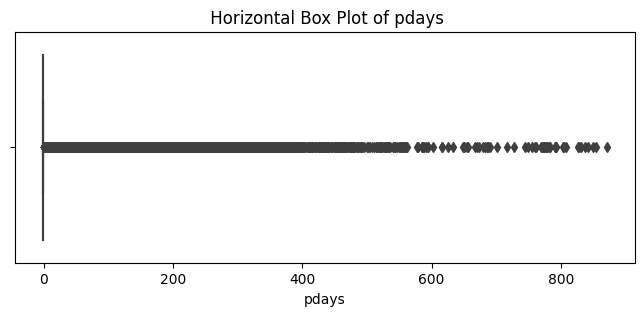

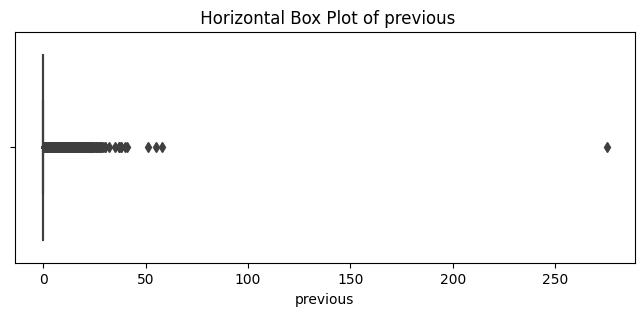

In [8]:
data = ['age','balance','day','duration','campaign','pdays','previous']
for column in data:
    plt.figure(figsize=(8, 3))  # Adjust the figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f" Horizontal Box Plot of {column}")
    plt.show()

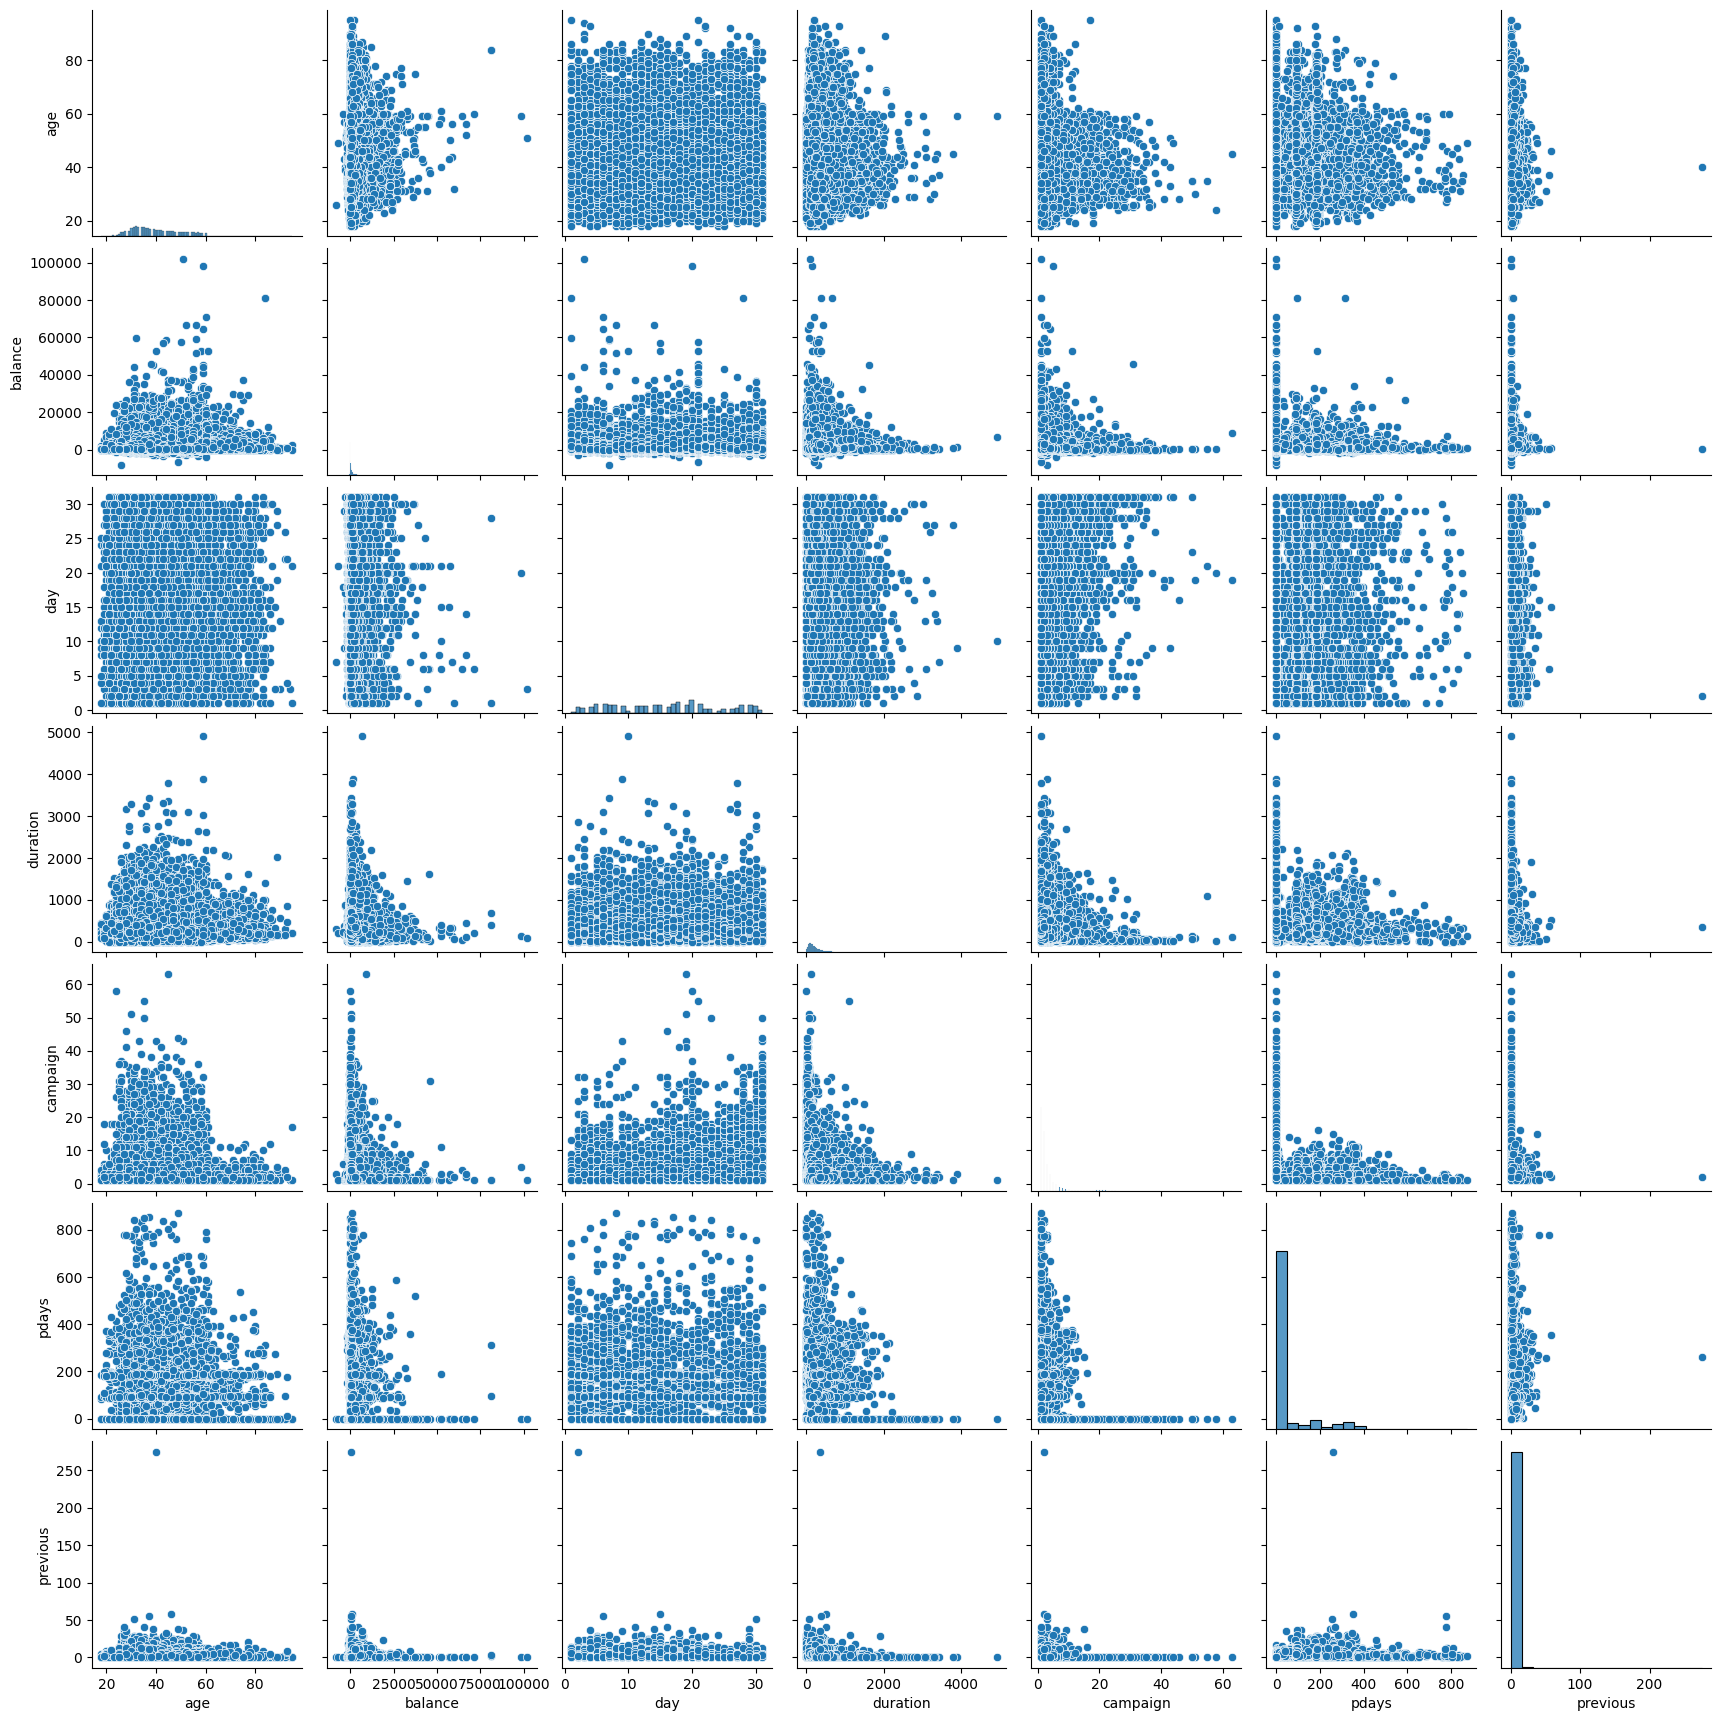

In [9]:
sns.pairplot(df)

In [10]:
from pandas.core.frame import DataFrame
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ["age", "balance","duration","campaign","pdays","previous" ]

# Apply the outlier removal method to each column
for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)


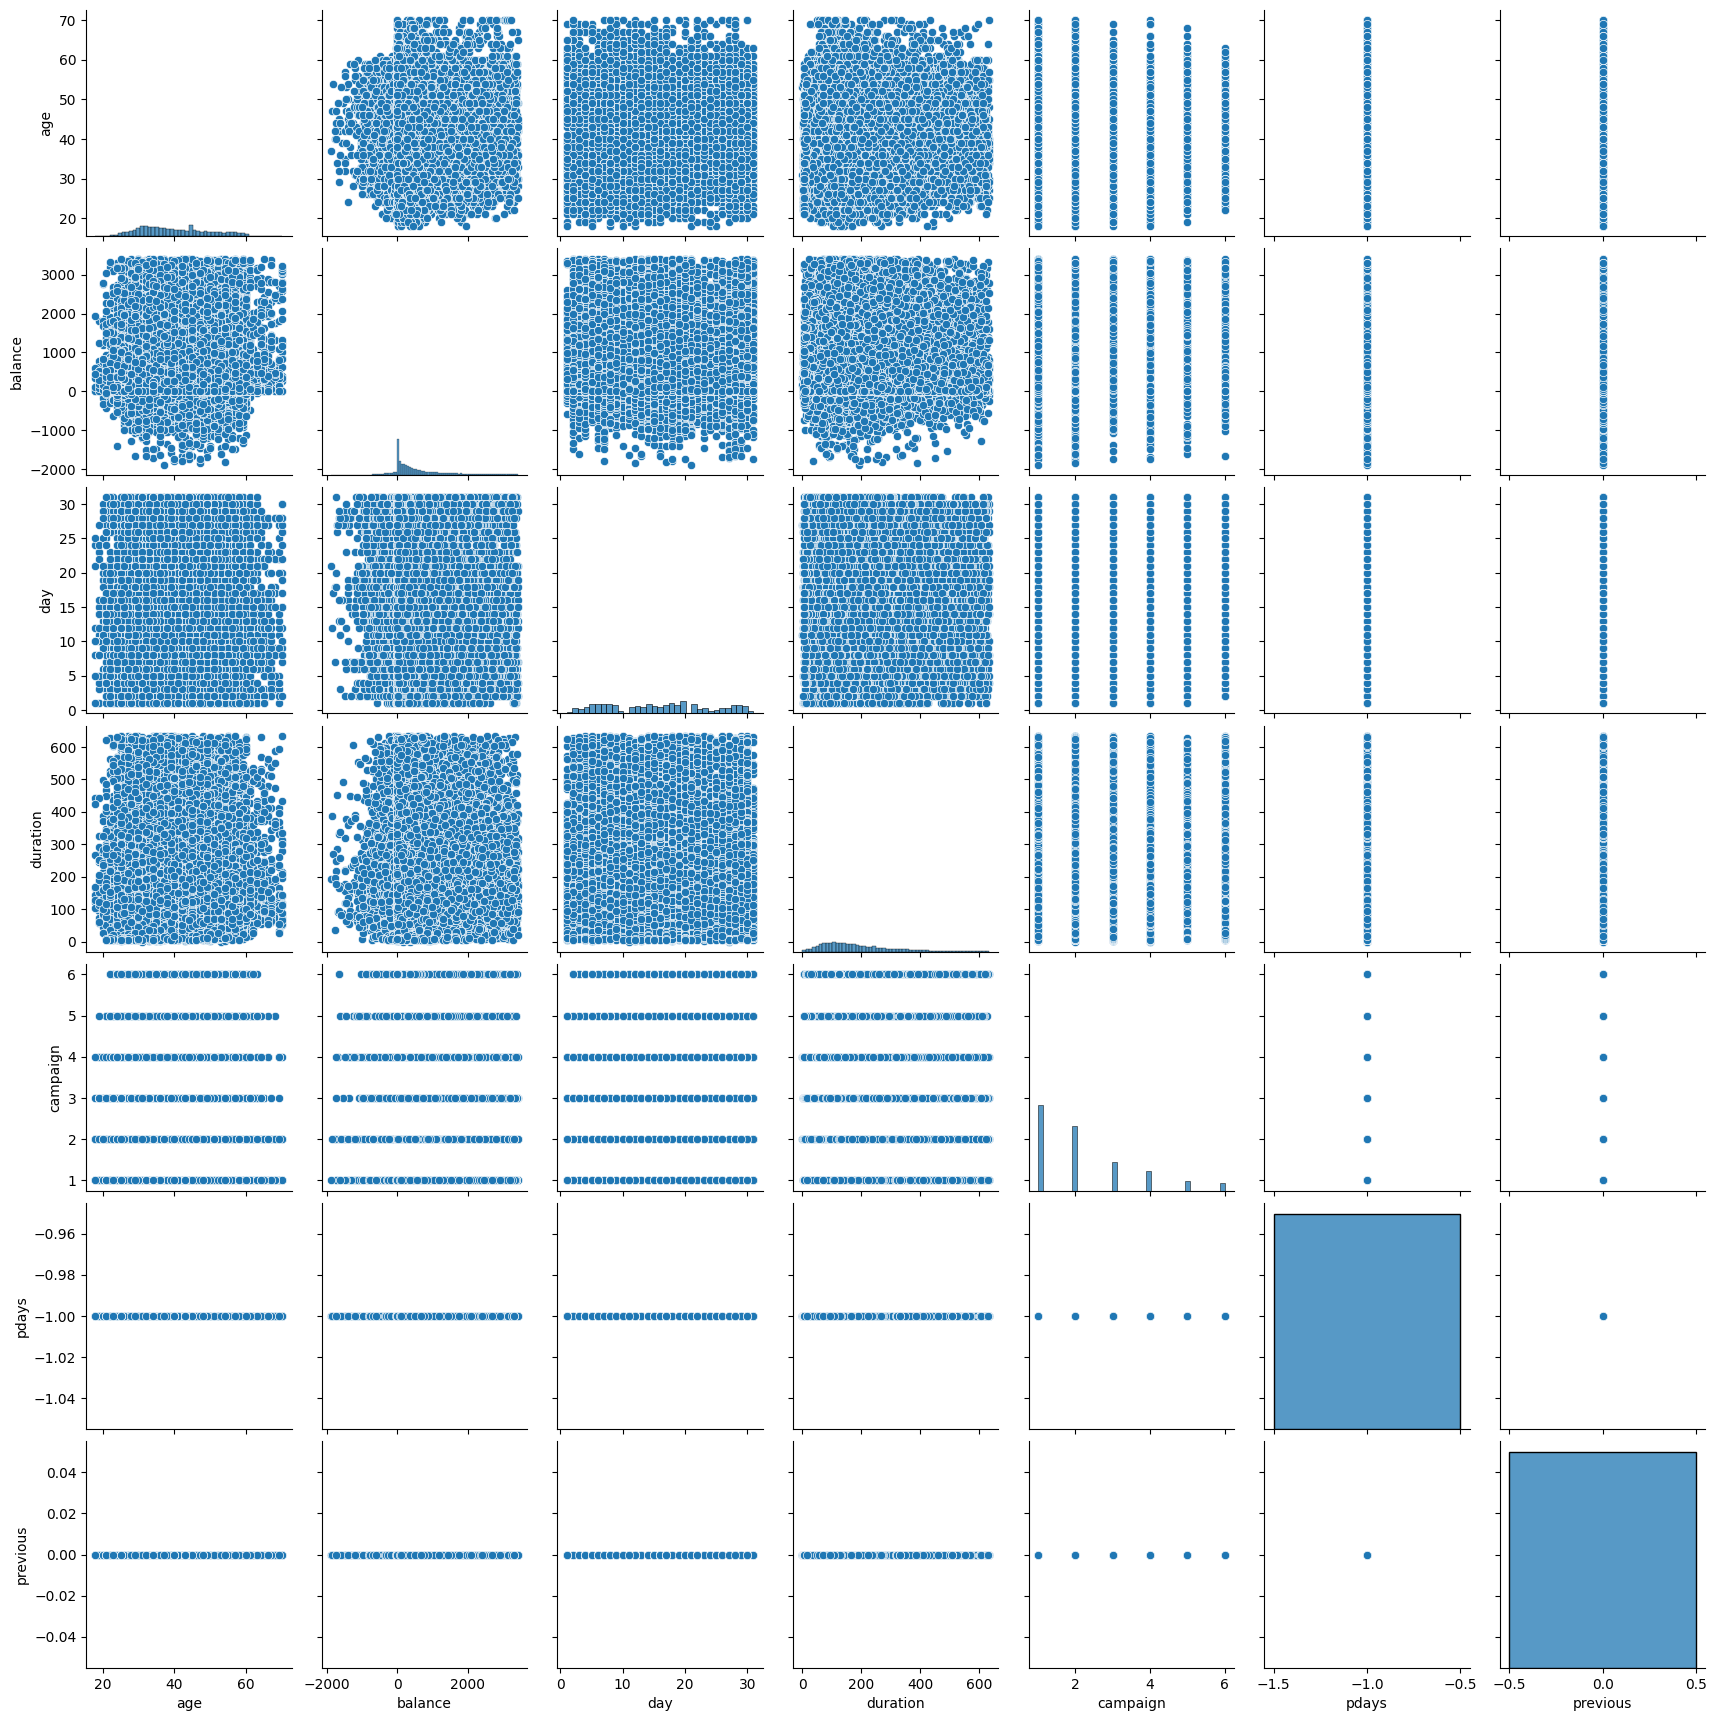

In [11]:
sns.pairplot(df)

In [12]:
df.shape

(28069, 17)

<Axes: >

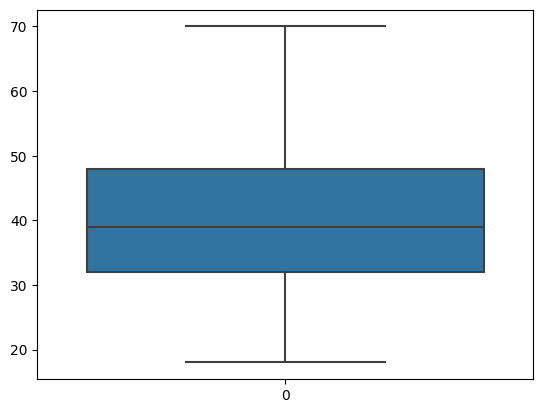

In [13]:
sns.boxplot(df["age"])

In [14]:
from pandas.core.frame import DataFrame
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ["age" ]

# Apply the outlier removal method to each column
for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)


<Axes: >

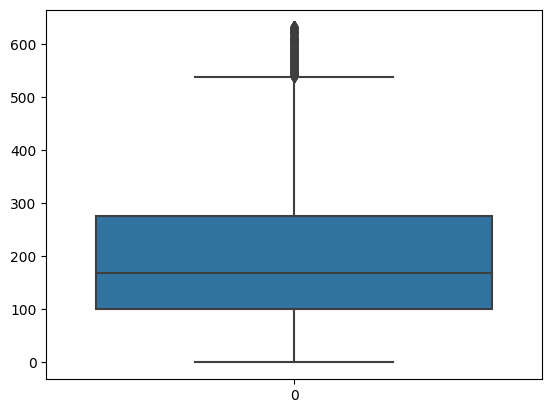

In [15]:
sns.boxplot(df["duration"])

In [16]:
from pandas.core.frame import DataFrame
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ["duration"]

# Apply the outlier removal method to each column
for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)


<Axes: >

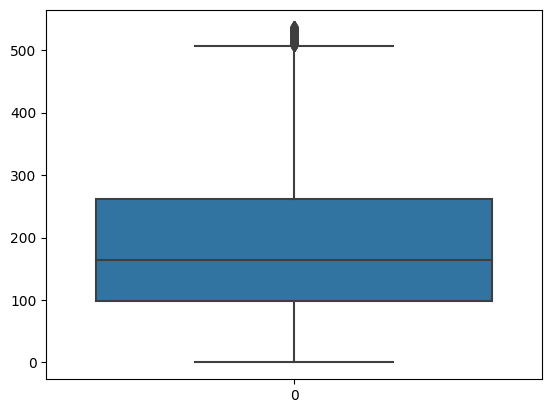

In [17]:
sns.boxplot(df["duration"])

In [18]:
df.shape

(27183, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27183 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27183 non-null  int64 
 1   job        27183 non-null  object
 2   marital    27183 non-null  object
 3   education  27183 non-null  object
 4   default    27183 non-null  object
 5   balance    27183 non-null  int64 
 6   housing    27183 non-null  object
 7   loan       27183 non-null  object
 8   contact    27183 non-null  object
 9   day        27183 non-null  int64 
 10  month      27183 non-null  object
 11  duration   27183 non-null  int64 
 12  campaign   27183 non-null  int64 
 13  pdays      27183 non-null  int64 
 14  previous   27183 non-null  int64 
 15  poutcome   27183 non-null  object
 16  y          27183 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [20]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [21]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [23]:
df['job'] = LE.fit_transform(df['job'])
df['marital'] = LE.fit_transform(df['marital'])
df['education'] = LE.fit_transform(df['education'])
df['default'] = LE.fit_transform(df['default'])
df['housing'] = LE.fit_transform(df['housing'])
df['loan'] = LE.fit_transform(df['loan'])
df['contact'] = LE.fit_transform(df['contact'])
df['month'] = LE.fit_transform(df['month'])
df['poutcome'] = LE.fit_transform(df['poutcome'])
df['y'] = LE.fit_transform(df['y'])

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0,0


In [38]:
# Data Partition X and Y
Y = df["y"]
X = df.iloc[:,0:16]

In [39]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0


In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,Y)
Y_pred = logreg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y,Y_pred)
cm

array([[25820,    33],
       [ 1305,    25]])

In [43]:
As = accuracy_score(Y,Y_pred)
print("Accuracy score:", As.round(3))


Accuracy score: 0.951


In [44]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Accuracy score:", As.round(3))
print("Sensitivity score:", recall_score(Y,Y_pred).round(3))
print("Precision score:", precision_score(Y,Y_pred).round(3))
print("F1 score:", f1_score(Y,Y_pred).round(3))

Accuracy score: 0.951
Sensitivity score: 0.019
Precision score: 0.431
F1 score: 0.036
